In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


# We will use the Auto-ViML Library to explore the Auto-NLP!

In [2]:
!pip install autoviml

     |████████████████████████████████| 113 kB 404 kB/s eta 0:00:01
     |████████████████████████████████| 125 kB 3.3 MB/s eta 0:00:01


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd

In [4]:
dataset = pd.read_csv('../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
dataset

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
review = dataset['Review']
rating = dataset['Rating']

In [6]:
review.head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

In [7]:
reviews_df = pd.DataFrame(np.hstack((review[:, None], rating[:, None])), columns=['reviews','rating'])
reviews_df.head(5)

,reviews,rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
convert_dict = {'reviews': str,
                'rating': int}
#Setting up a dictionary in order to ensure our variables into particular data type

In [9]:
reviews_df = reviews_df.astype(convert_dict)
reviews_df

,reviews,rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [10]:
reviews_df['target'] = reviews_df["rating"].apply(lambda x: 1 if x>=4 else 0)
reviews_df
#Creating a seperate target variable in-order to segregate our ratings into Binary classification!

,reviews,rating,target
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,1
20487,great location price view hotel great quick pl...,4,1
20488,"ok just looks nice modern outside, desk staff ...",2,0
20489,hotel theft ruined vacation hotel opened sept ...,1,0


In [11]:
reviews_df.shape

(20491, 3)

In [12]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  20491 non-null  object
 1   rating   20491 non-null  int64 
 2   target   20491 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 480.4+ KB


In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews_df, test_size=0.24)
#Splitting our data into training and testing data

In [14]:
from autoviml.Auto_NLP import Auto_NLP

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk


Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


Auto NLP processing on NLP Column: reviews
Shape of Train Data: 15573 rows
    Shape of Test Data: 4918 rows


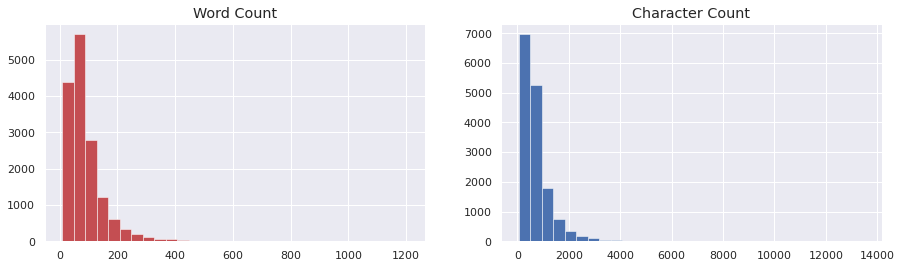

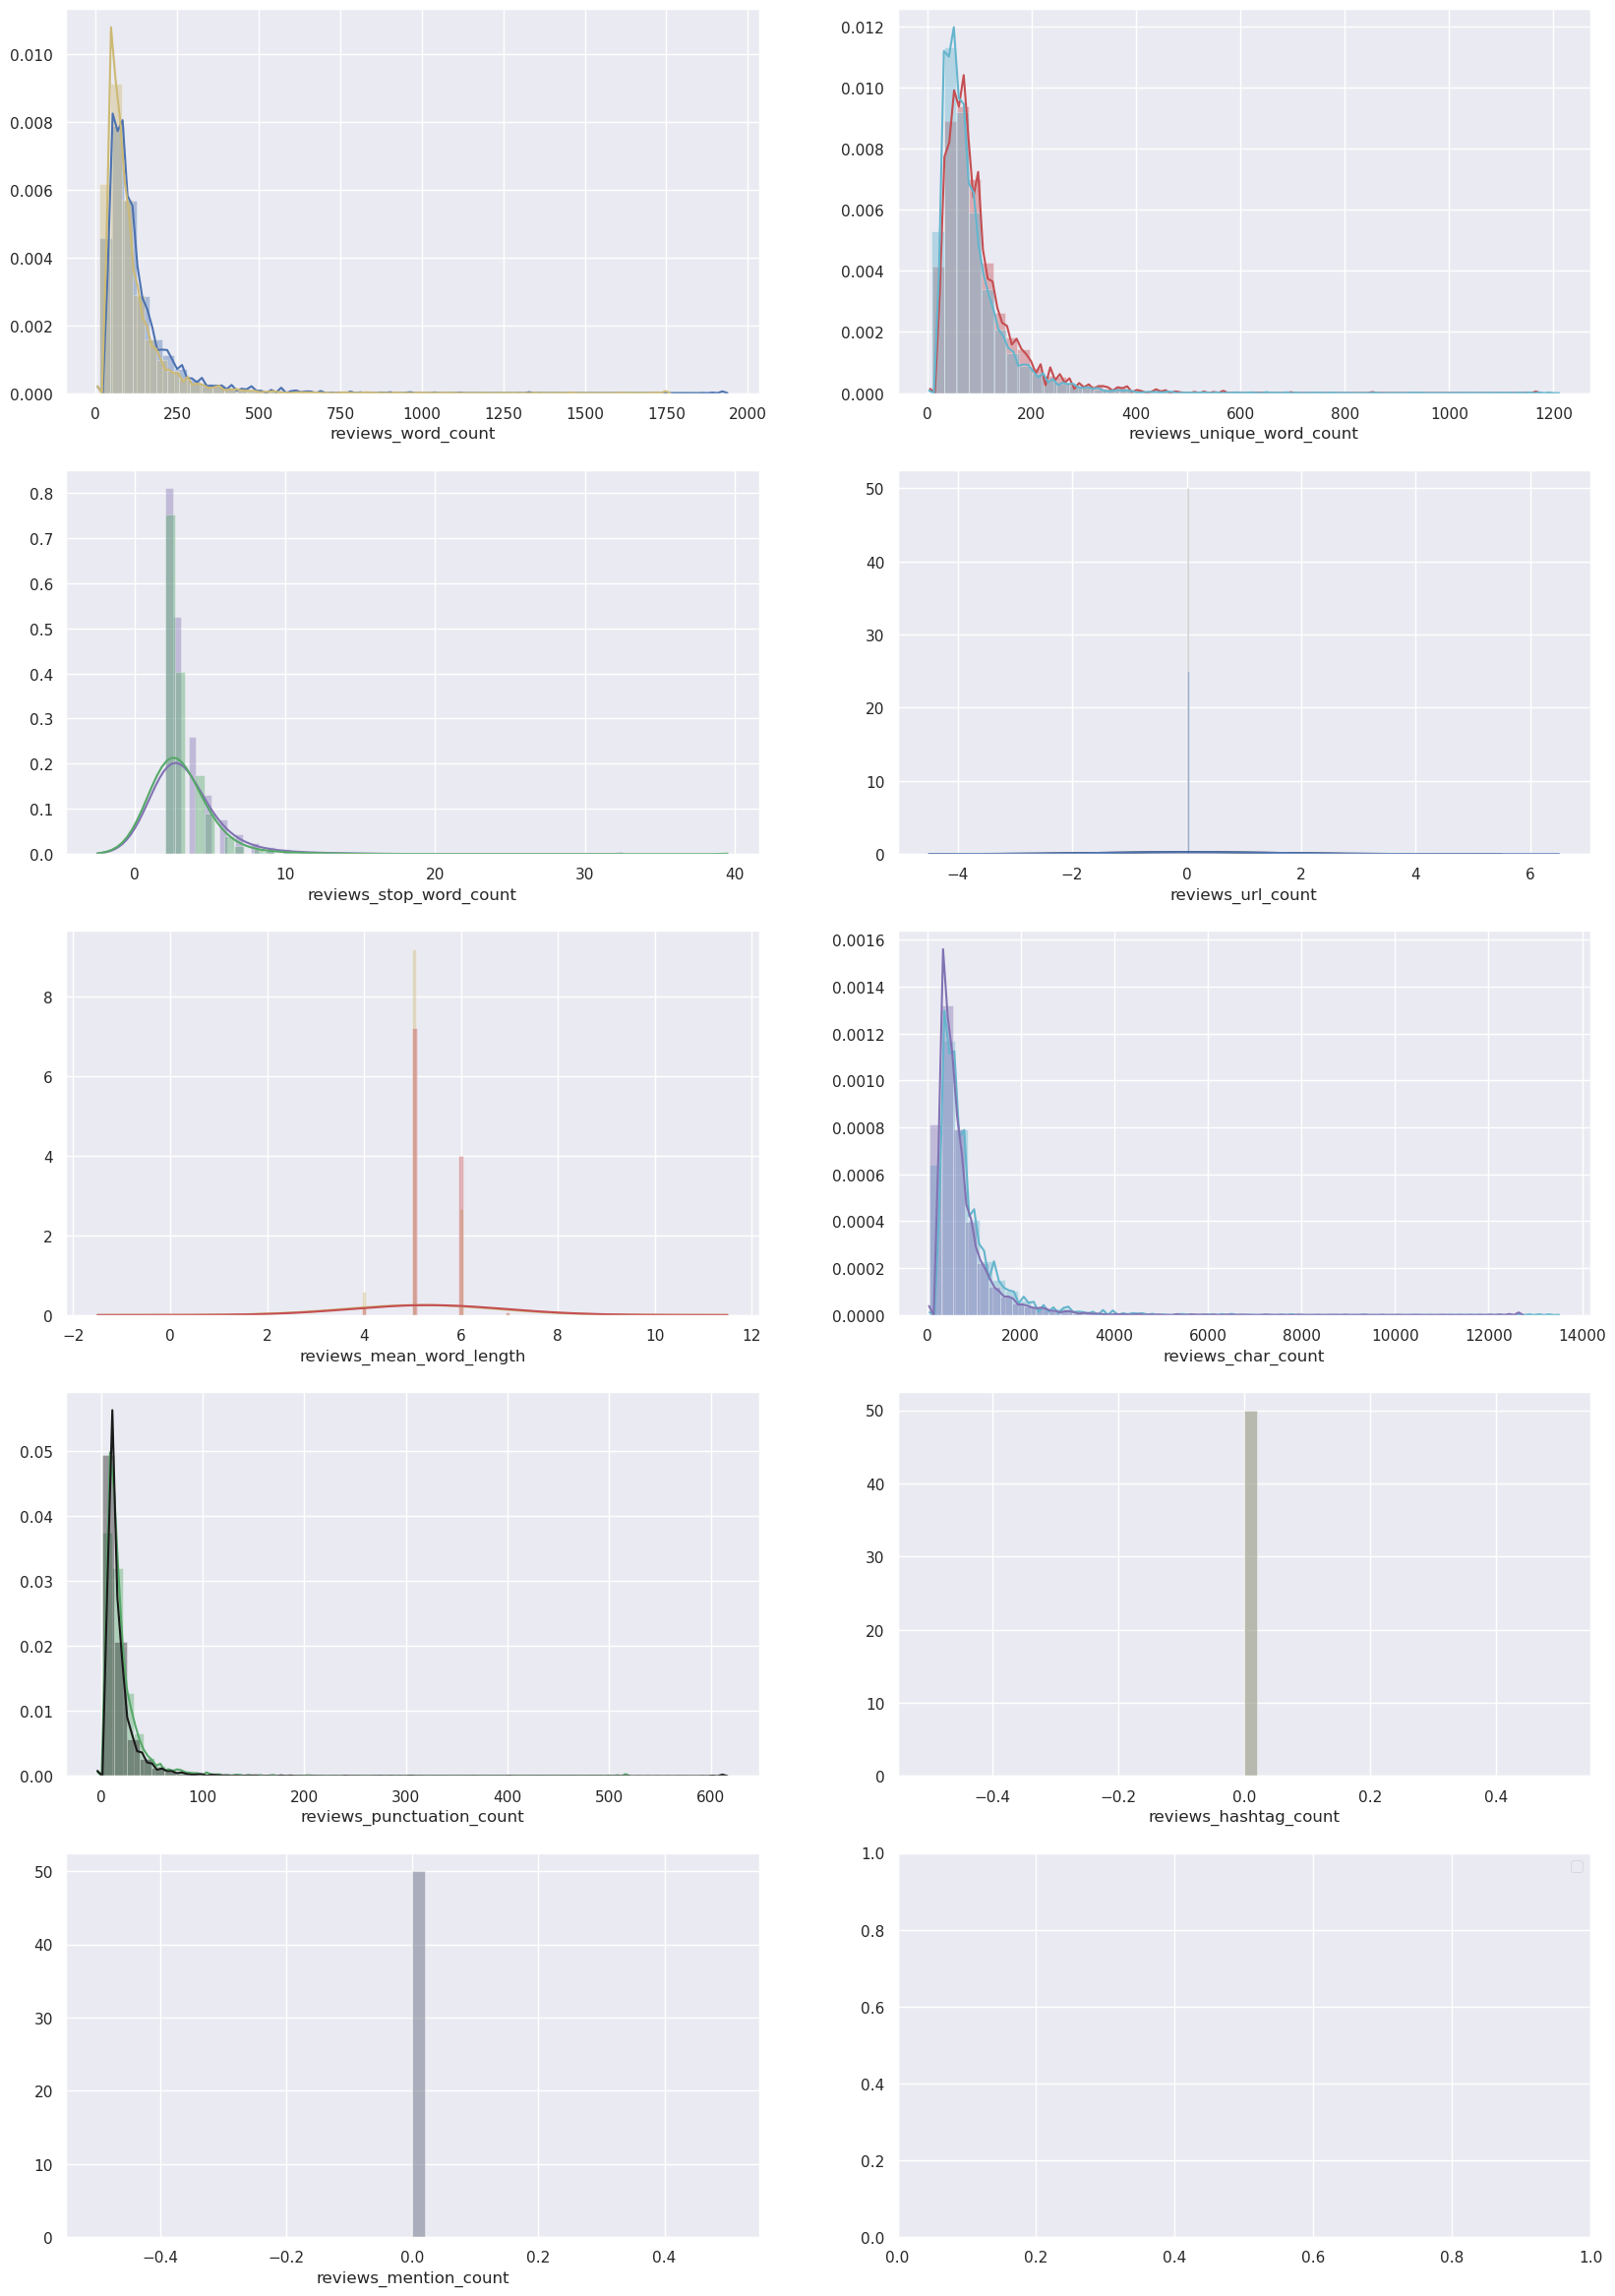

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for reviews column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 47 seconds


In [ ]:
nlp_column = 'reviews'
target = 'target'
train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(
    nlp_column, train, test, target, score_type = 'balanced_accuracy',
    modeltype = 'classification', top_num_features = 100, verbose = 2, build_model = True
)

In [ ]:
nlp_transformer

In [ ]:
nlp_transformer.predict(test[nlp_column])